# Internet Advertisements

Image data has been given from the internet. The aim is to predict if an image is an Advertisement (Ad) or not an Advertisement (non-Ad)

In [34]:
#importing all the packages required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
data_train = pd.read_csv("data/training.csv",header=None)
data_test = pd.read_csv("data/test.csv",header=None)
print("Shape of the Training Data :",data_train.shape)
print("Shape of the Testing Data :",data_test.shape)

Shape of the Training Data : (2623, 1559)
Shape of the Testing Data : (656, 1558)


/home/krushika/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
def preprocess_data(df):
    df.rename(columns={1558:"Target"},inplace=True)
    df.replace({'nonad.':0,'ad.':1},inplace=True)
    df.replace('[?]',np.nan,inplace=True,regex=True)
    df.head()
    
def plot_missing_data(df):
    df_missing = df[df.columns[:3]]
    sns.heatmap(df_missing.isnull(),cbar=False)
    plt.show()
    
def check_class_dist(df):
    fig1 = sns.countplot(x="Target",data=df,palette='husl')
    plt.title("Class Distribution")
    plt.show()

def handling_missing_values(df,strategy):
    imp = SimpleImputer(missing_values=np.nan, strategy=strategy)
    data_handled = pd.DataFrame(imp.fit_transform(df))
#     data_handled.rename(columns={1558:"Target"},inplace=True)
    return data_handled

def plot_clf_results(clf):
    print("********Classifier Used********")
    print(clf,"\n")
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("Accuracy of the model :",accuracy)
    print("\n","Classification Report :")
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test,y_pred)
    df_cm = pd.DataFrame(cm)
    plt.title("Confusion Matrix")
    sns.heatmap(df_cm,annot=True,fmt='d',cmap="YlGnBu",linewidths=0.5)
    plt.show()

In [4]:
preprocess_data(data_train)
preprocess_data(data_test)

In [5]:
data_mean_train = handling_missing_values(data_train,'mean')
data_mean_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,64.471579,157.296686,3.915056,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,64.471579,157.296686,3.915056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15.000000,60.000000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28.000000,230.000000,8.214200,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23.000000,216.000000,9.391300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


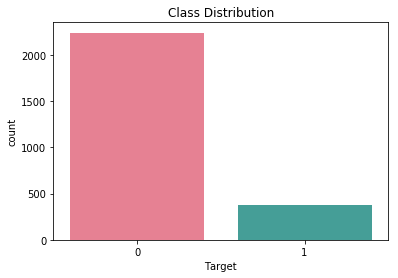

In [37]:
check_class_dist(data_train)

In [6]:
X = data_mean_train[data_mean_train.columns[:1558]]
Y = data_mean_train[1558]

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state=42)

## Implementing LinearSVC

********Classifier Used********
SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 

Accuracy of the model : 0.9028571428571428

 Classification Report :
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       442
         1.0       0.73      0.61      0.67        83

   micro avg       0.90      0.90      0.90       525
   macro avg       0.83      0.79      0.80       525
weighted avg       0.90      0.90      0.90       525



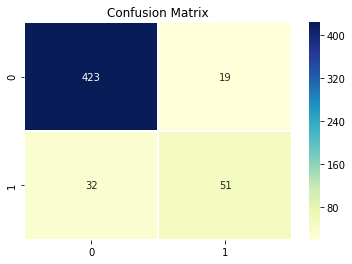

In [40]:
clf_svm = svm.SVC(gamma='scale',class_weight="balanced",probability=True)
clf_svm.fit(x_train, y_train)
plot_clf_results(clf_svm)

## Implementing K-Nearest Neighbours

********Classifier Used********
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform') 

Accuracy of the model : 0.9542857142857143

 Classification Report :
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       442
         1.0       0.89      0.81      0.85        83

   micro avg       0.95      0.95      0.95       525
   macro avg       0.93      0.89      0.91       525
weighted avg       0.95      0.95      0.95       525



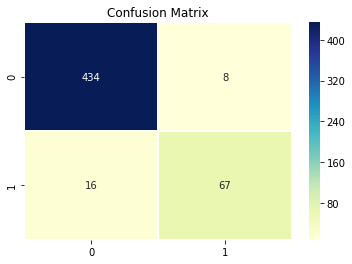

In [32]:
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(x_train,y_train)
plot_clf_results(clf_knn)

/home/krushika/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


********Classifier Used********
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) 

Accuracy of the model : 0.9752380952380952

 Classification Report :
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       442
         1.0       0.99      0.86      0.92        83

   micro avg       0.98      0.98      0.98       525
   macro avg       0.98      0.93      0.95       525
weighted avg       0.98      0.98      0.97       525



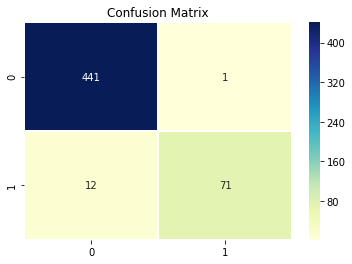

In [35]:
clf_lr = LogisticRegression()
clf_lr.fit(x_train,y_train)
plot_clf_results(clf_lr)

********Classifier Used********
GaussianNB(priors=None, var_smoothing=1e-09) 

Accuracy of the model : 0.7961904761904762

 Classification Report :
              precision    recall  f1-score   support

         0.0       0.98      0.77      0.86       442
         1.0       0.43      0.92      0.59        83

   micro avg       0.80      0.80      0.80       525
   macro avg       0.71      0.84      0.73       525
weighted avg       0.89      0.80      0.82       525



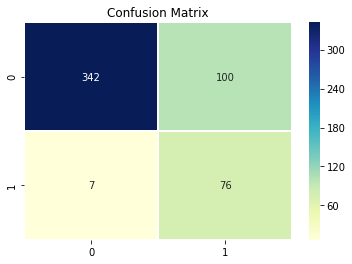

In [38]:
clf_nb = GaussianNB()
clf_nb.fit(x_train,y_train)
plot_clf_results(clf_nb)

********Classifier Used********
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False) 

Accuracy of the model : 0.9257142857142857

 Classification Report :
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       442
         1.0       0.98      0.54      0.70        83

   micro avg       0.93      0.93      0.93       525
   macro avg       0.95      0.77      0.83       525
weighted avg       0.93      0.93      0.92       525



/home/krushika/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


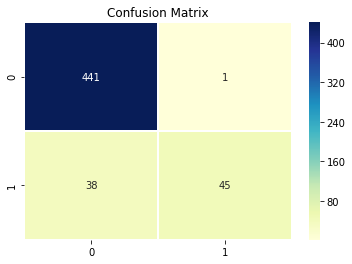

In [39]:
clf_sgd = SGDClassifier()
clf_sgd.fit(x_train,y_train)
plot_clf_results(clf_sgd)

********Classifier Used********
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

Accuracy of the model : 0.9638095238095238

 Classification Report :
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       442
         1.0       0.86      0.92      0.89        83

   micro avg       0.96      0.96      0.96       525
   macro avg       0.92      0.94      0.93       525
weighted avg       0.96      0.96      0.96       525



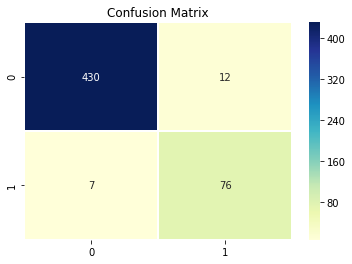

In [41]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(x_train,y_train)
plot_clf_results(clf_dt)

In [ ]:
clf_rf = RandomForestClassifier()
clf_rf.fit()